Project Name: Heart Attack Risk Predictor

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df= pd.read_csv("/content/heart.csv")

In [ ]:
df= df.drop(['oldpeak','slp','thall'],axis=1)

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


Data Analysis

In [ ]:
df.shape

(303, 11)

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
caa,0


In [ ]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.181053,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.072042,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.213177,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.115739,-0.436757
caa,0.276326,0.118261,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,1.000000,-0.391724


<Axes: >

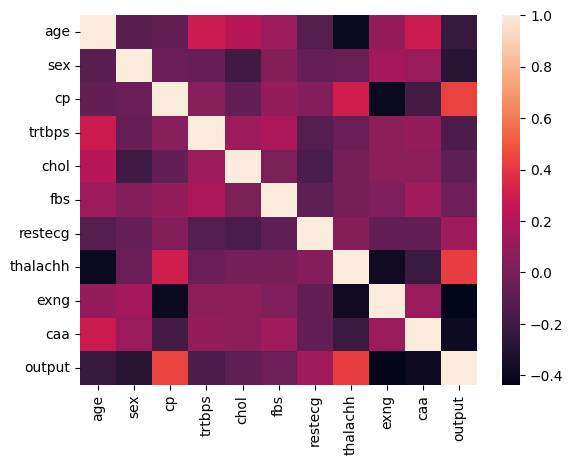

In [ ]:
sns.heatmap(df.corr())

<Axes: title={'center': 'Age of Patients'}, xlabel='Age', ylabel='count'>

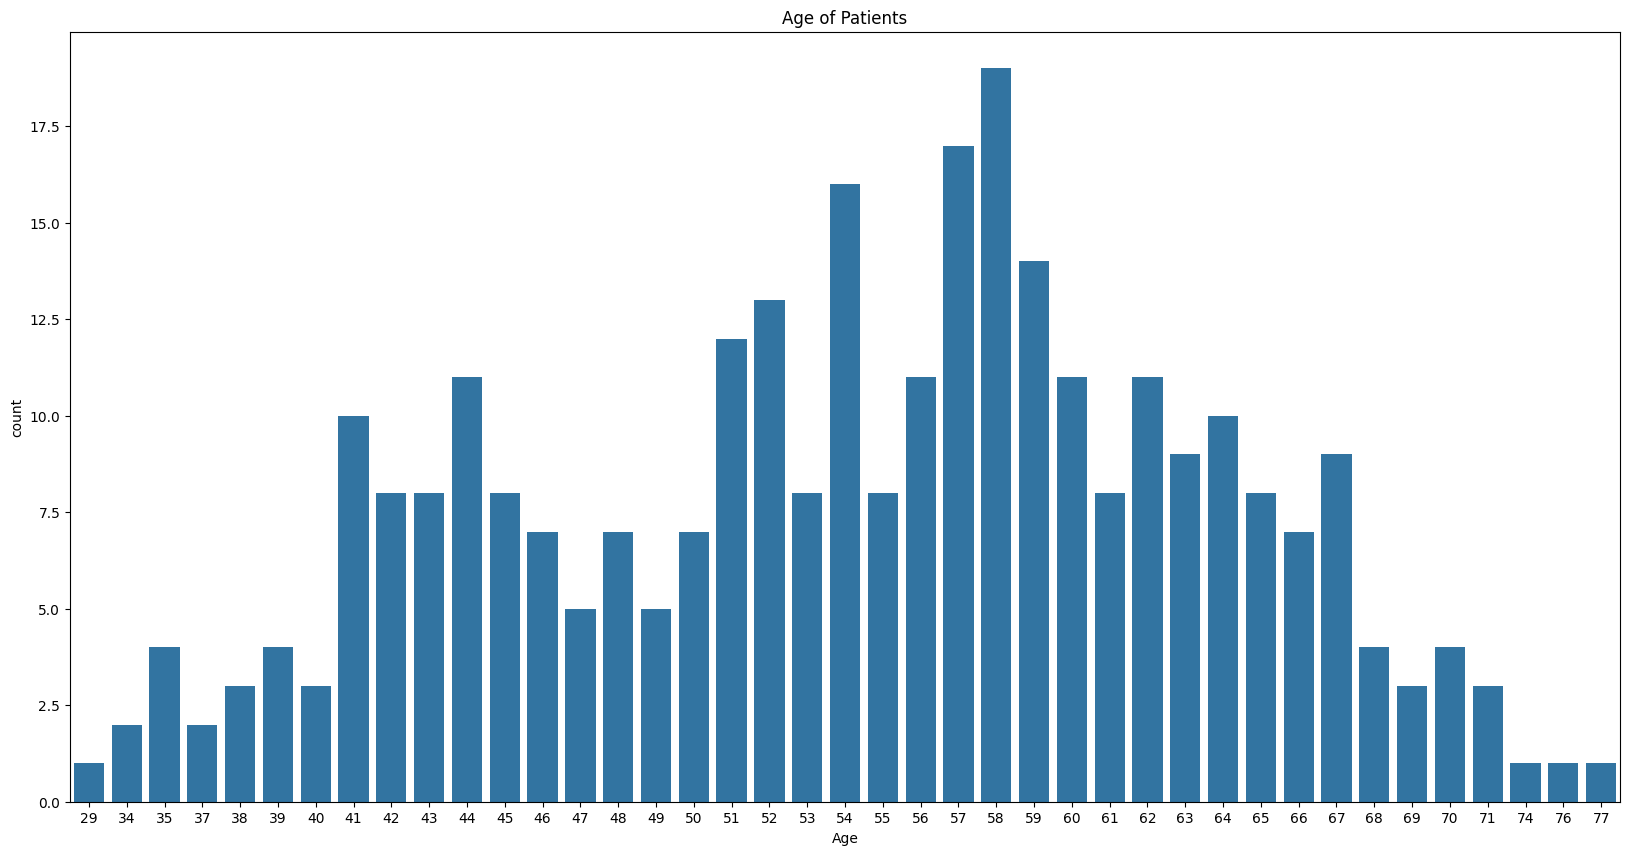

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Age of Patients")
plt.xlabel("Age")
sns.countplot(x='age',data=df)

<Axes: title={'center': 'Sex of Patients,0=Female and 1=Male'}, xlabel='sex', ylabel='count'>

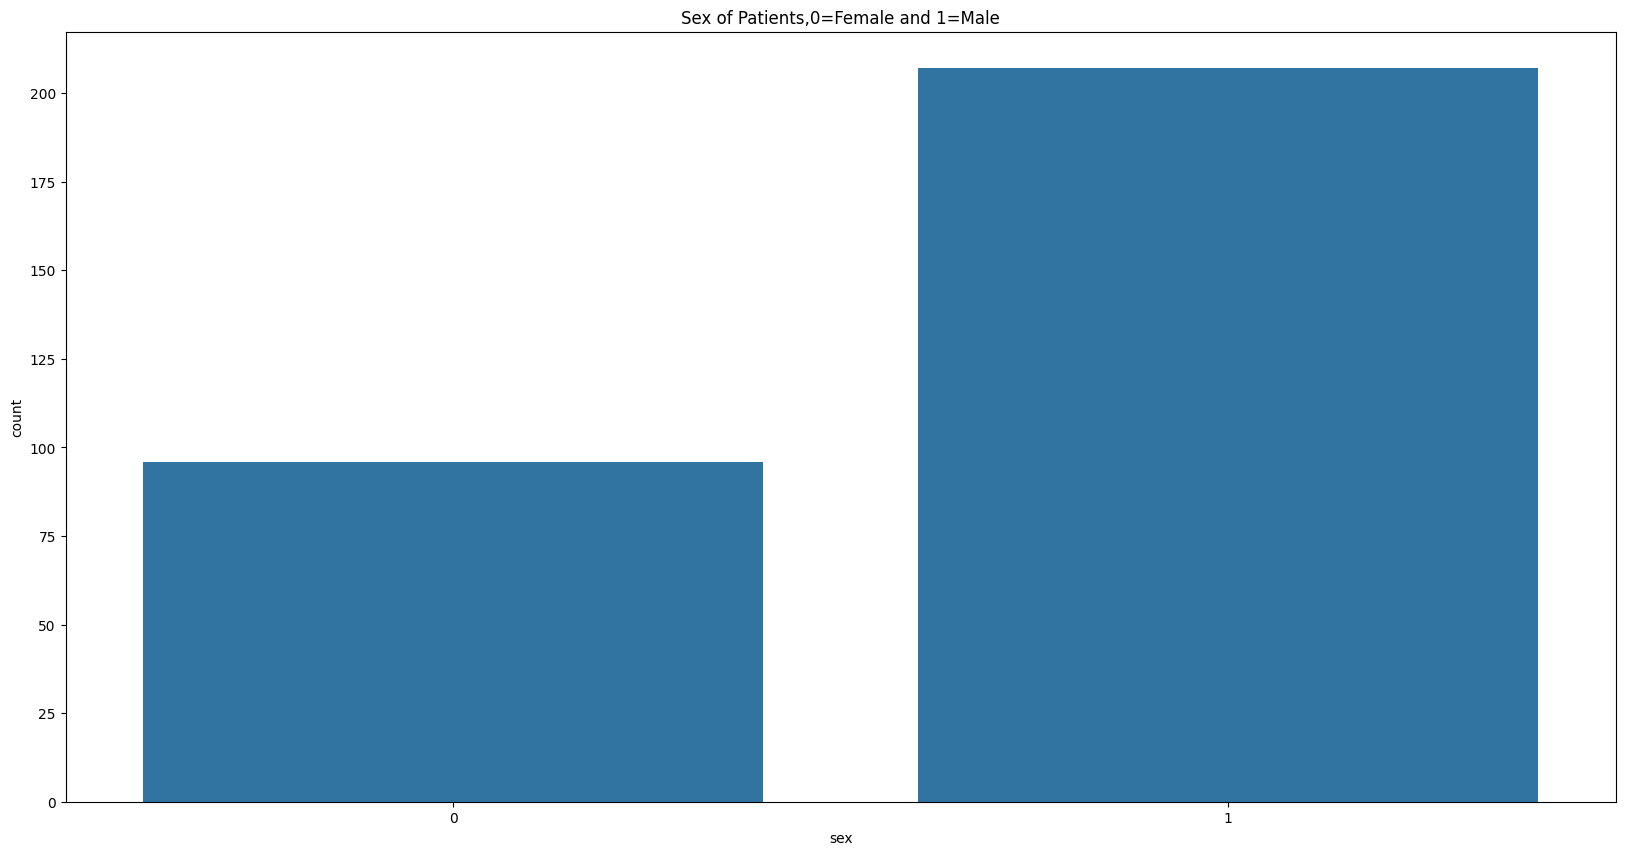

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Sex of Patients,0=Female and 1=Male")

sns.countplot(x='sex',data=df)

In [ ]:
cp_data= df['cp'].value_counts().reset_index()
cp_data['cp'] = cp_data['cp'].astype(object)
cp_data.loc[3, 'cp']= 'asymptomatic'
cp_data.loc[2, 'cp']= 'non-anginal'
cp_data.loc[1, 'cp']= 'Atyppical Anigma'
cp_data.loc[0, 'cp']= 'Typical Anigma'
cp_data

,cp,count
0,Typical Anigma,143
1,Atyppical Anigma,87
2,non-anginal,50
3,asymptomatic,23


<Axes: title={'center': 'Chest Pain of Patients'}, xlabel='cp', ylabel='count'>

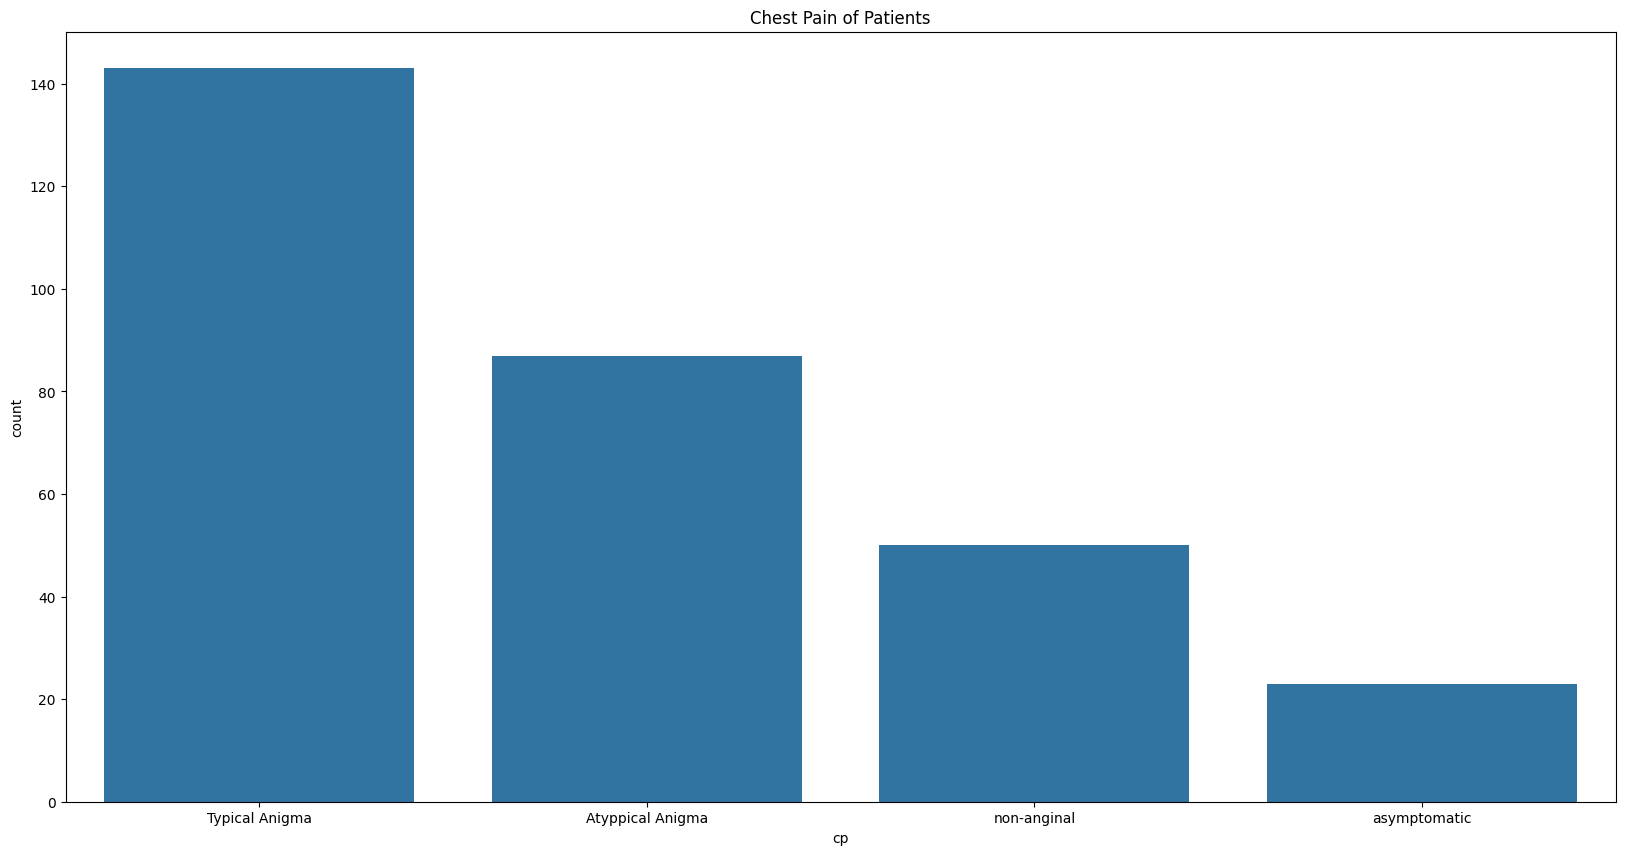

In [85]:
plt.figure(figsize=(20, 10))
plt.title("Chest Pain of Patients")
sns.barplot(x=cp_data['cp'],y= cp_data['count'])

In [87]:
ecg_data= df['restecg'].value_counts().reset_index()
ecg_data['restecg'] = ecg_data['restecg'].astype(object)
ecg_data.loc[0, 'restecg']= 'normal'
ecg_data.loc[1, 'restecg']= 'having ST-T wave abnormality'
ecg_data.loc[2, 'restecg']= 'showing probable or definite left ventricular hypertrophy by Estes'
ecg_data

,restecg,count
0,normal,152
1,having ST-T wave abnormality,147
2,showing probable or definite left ventricular ...,4


<Axes: title={'center': 'ECG data of Patients'}, xlabel='restecg', ylabel='count'>

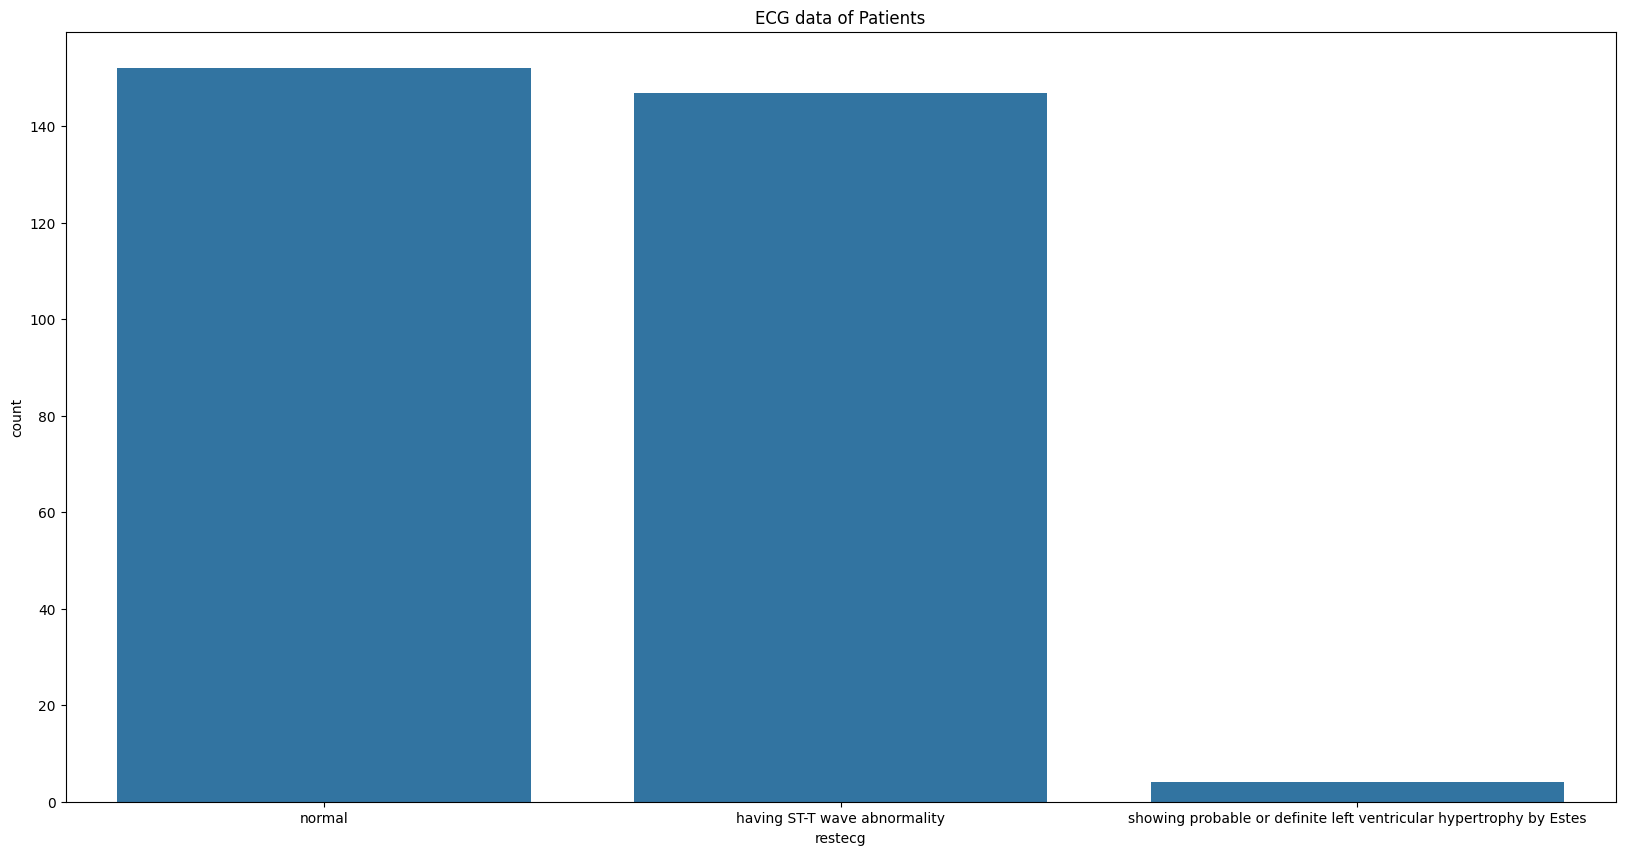

In [86]:
plt.figure(figsize=(20, 10))
plt.title("ECG data of Patients")
sns.barplot(x=ecg_data['restecg'],y= ecg_data['count'])

/tmp/ipython-input-1144681631.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trtbps'], kde=True, color = 'magenta')
/tmp/ipython-input-1144681631.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['thalachh'], kde=True, color = 'teal')


Text(0.5, 0, 'Maximum Heart Rate Achieved (bpm)')

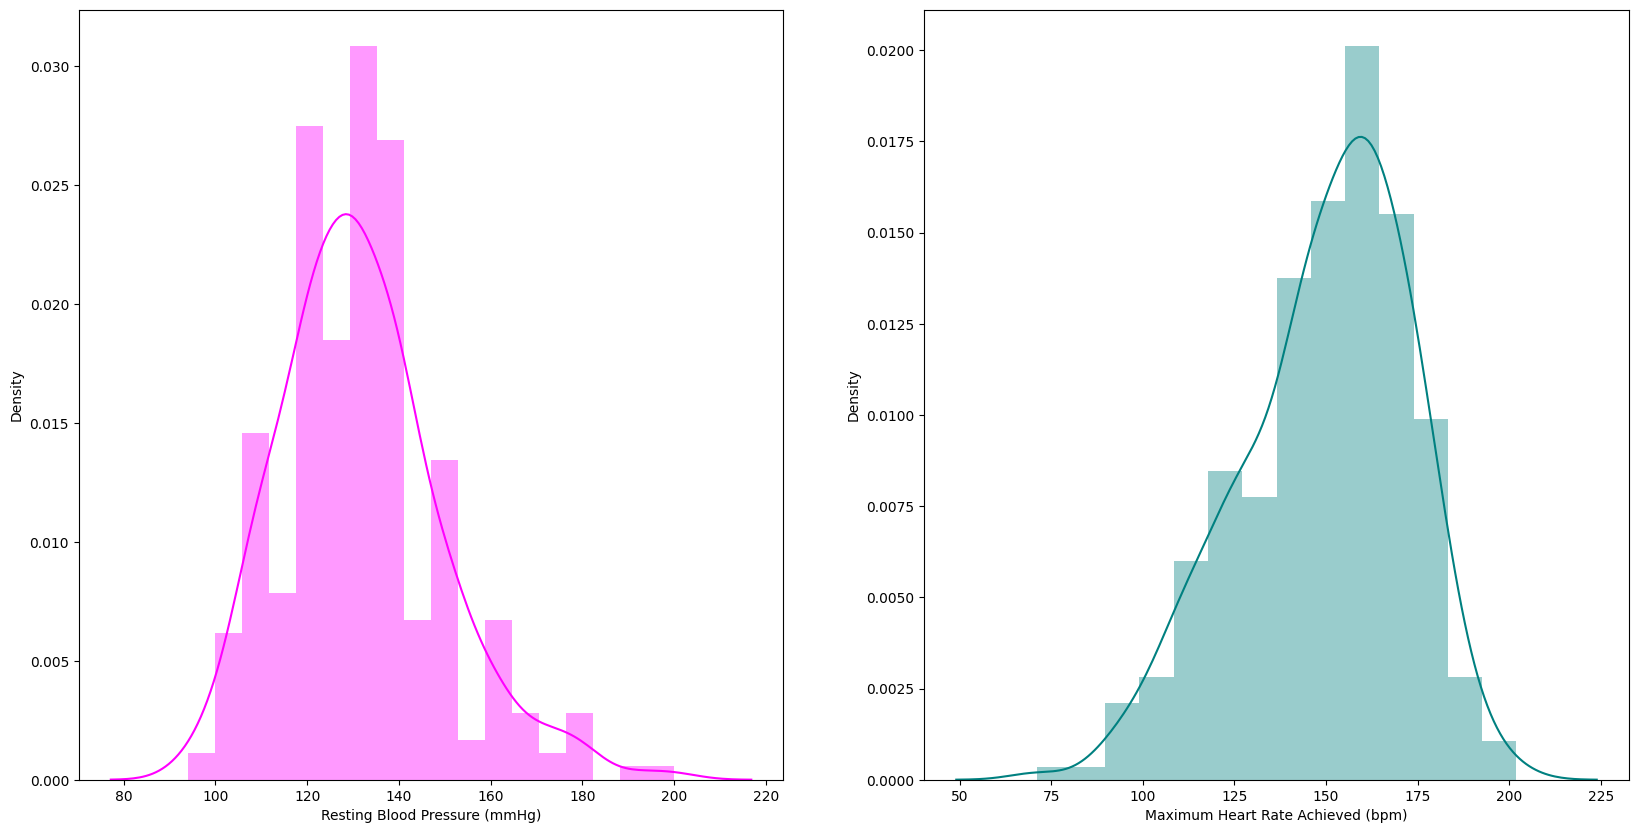

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df['trtbps'], kde=True, color = 'magenta')
plt.xlabel("Resting Blood Pressure (mmHg)")
plt.subplot(1,2,2)
sns.distplot(df['thalachh'], kde=True, color = 'teal')
plt.xlabel("Maximum Heart Rate Achieved (bpm)")

/tmp/ipython-input-195076517.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chol'], kde=True, color = 'red')


Text(0.5, 0, 'Cholestrol')

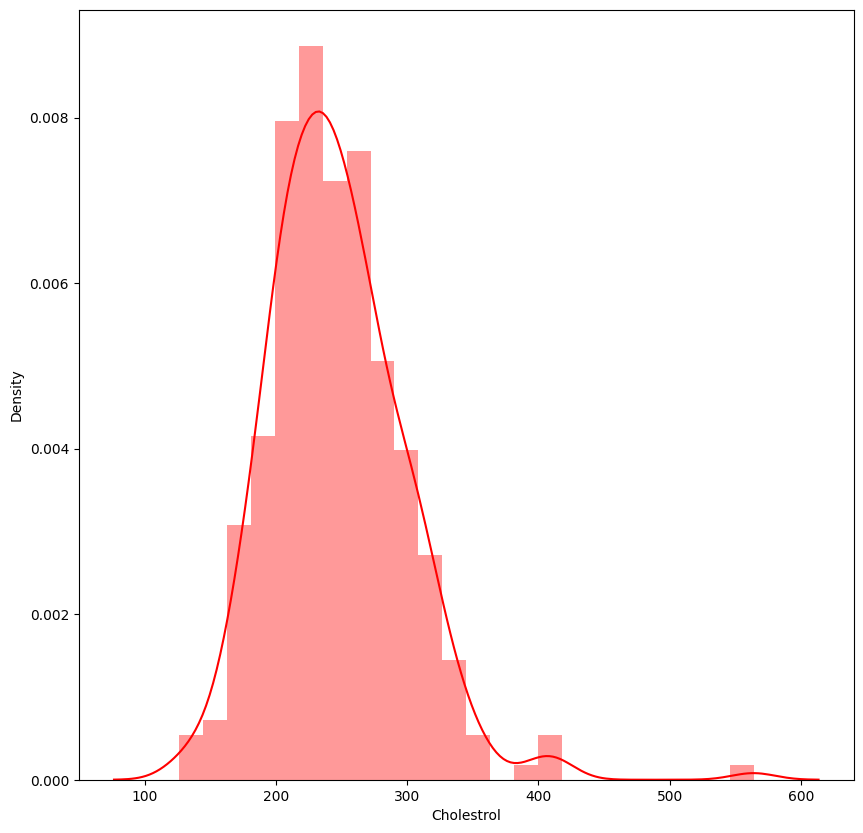

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df['chol'], kde=True, color = 'red')
plt.xlabel("Cholestrol")

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale=StandardScaler()

In [ ]:
scale.fit(df)

StandardScaler()

In [ ]:
df= scale.transform(df)

In [ ]:
df=pd.DataFrame(df,columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'caa', 'output'])

In [33]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429,0.914529


In [34]:
X= df.iloc[:,:-1]
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429
...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.714429
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,-0.714429
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,1.244593
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.265082


In [35]:
y= df.iloc[:,-1:]
y

,output
0,0.914529
1,0.914529
2,0.914529
3,0.914529
4,0.914529
...,...
298,-1.093459
299,-1.093459
300,-1.093459
301,-1.093459


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print(y)

       output
0    0.914529
1    0.914529
2    0.914529
3    0.914529
4    0.914529
..        ...
298 -1.093459
299 -1.093459
300 -1.093459
301 -1.093459
302 -1.093459

[303 rows x 1 columns]


Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
lbl= LabelEncoder()

In [40]:
encoded_y= lbl.fit_transform(y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
logreg= LogisticRegression()

In [42]:
logreg = LogisticRegression()
logreg.fit(X_train, encoded_y)

LogisticRegression()

In [44]:
Y_pred1 = logreg.predict(X_test)
display(Y_pred1)

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0])

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [46]:
encoded_ytest= lbl.fit_transform(y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
Y_pred1 = logreg.predict(X_test)
lr_conf_matrix = confusion_matrix(encoded_ytest,Y_pred1 )
lr_acc_score = accuracy_score(encoded_ytest, Y_pred1)

In [48]:
lr_conf_matrix

array([[35,  9],
       [ 4, 43]])

In [49]:
print(lr_acc_score*100,"%")

85.71428571428571 %


Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
tree= DecisionTreeClassifier()

In [52]:
tree.fit(X_train,encoded_y)

DecisionTreeClassifier()

In [53]:
ypred2=tree.predict(X_test)

In [54]:
encoded_ytest= lbl.fit_transform(y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
tree_conf_matrix = confusion_matrix(encoded_ytest,ypred2 )
tree_acc_score = accuracy_score(encoded_ytest, ypred2)

In [56]:
tree_conf_matrix

array([[27, 17],
       [ 9, 38]])

In [57]:
print(tree_acc_score*100,"%")

71.42857142857143 %


Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf= RandomForestClassifier()

In [60]:
rf.fit(X_train,encoded_y)

RandomForestClassifier()

In [61]:
ypred3 = rf.predict(X_test)

In [62]:
rf_conf_matrix = confusion_matrix(encoded_ytest,ypred3 )
rf_acc_score = accuracy_score(encoded_ytest, ypred3)

In [63]:
rf_conf_matrix

array([[32, 12],
       [ 5, 42]])

In [64]:
print(rf_acc_score*100,"%")

81.31868131868131 %


K Nearest Neighbour

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
error_rate= []
for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,encoded_y)
    pred= knn.predict(X_test)
    error_rate.append(np.mean(pred != encoded_ytest))

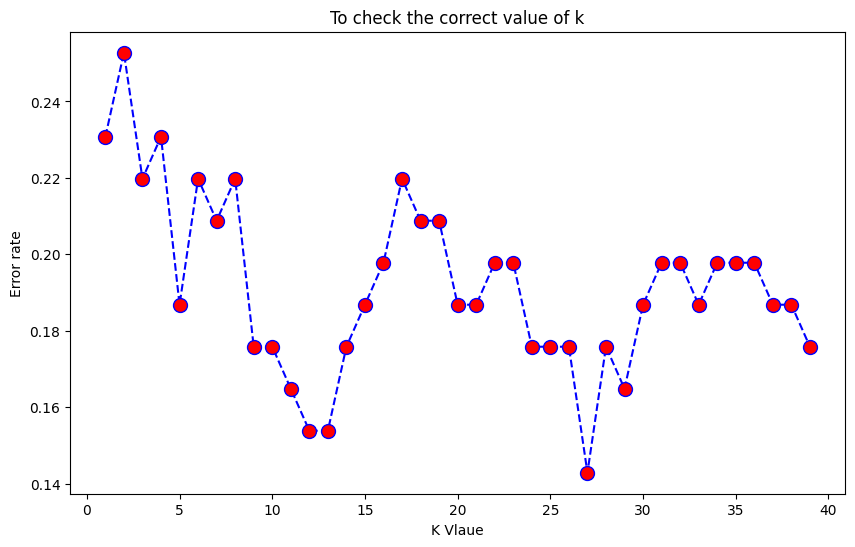

In [68]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('K Vlaue')
plt.ylabel('Error rate')
plt.title('To check the correct value of k')
plt.show()

In [70]:
knn= KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,encoded_y)
ypred4= knn.predict(X_test)

In [71]:
knn_conf_matrix = confusion_matrix(encoded_ytest,ypred4 )
knn_acc_score = accuracy_score(encoded_ytest, ypred4)

In [72]:
knn_conf_matrix

array([[35,  9],
       [ 5, 42]])

In [73]:
print(knn_acc_score*100,"%")

84.61538461538461 %


Support Vector Machine(SVM)

In [74]:
from sklearn import svm

In [75]:
svm= svm.SVC()

In [76]:
svm.fit(X_train,encoded_y)

SVC()

In [78]:
ypred5= svm.predict(X_test)

In [79]:
svm_conf_matrix = confusion_matrix(encoded_ytest,ypred5)
svm_acc_score = accuracy_score(encoded_ytest, ypred5)

In [80]:
svm_conf_matrix

array([[34, 10],
       [ 8, 39]])

In [81]:
print(svm_acc_score*100,"%")

80.21978021978022 %


In [82]:
model_acc= pd.DataFrame({'Model' : ['Logistic Regression','Decision Tree','Random Forest','K Nearest Neighbor','SVM'],'Accuracy' : [lr_acc_score*100,tree_acc_score*100,rf_acc_score*100,knn_acc_score*100,svm_acc_score*100]})

In [83]:
model_acc = model_acc.sort_values(by=['Accuracy'],ascending=False)

In [84]:
model_acc

,Model,Accuracy
0,Logistic Regression,85.714286
3,K Nearest Neighbor,84.615385
2,Random Forest,81.318681
4,SVM,80.219780
1,Decision Tree,71.428571
